In [1]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets --quiet

In [2]:
from tabulate import tabulate


In [21]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

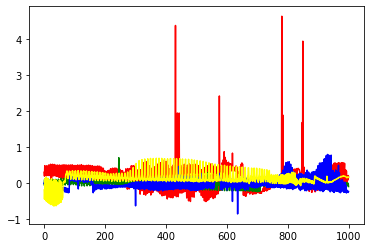

In [4]:
x_1 = pd.read_csv("normal_processed.csv", header=None)
x_2 = pd.read_csv("bearing_processed.csv",header=None)
x_3 = pd.read_csv("unbalanced_processed.csv" , header=None)
x_4 = pd.read_csv("misalign_processed.csv",header=None)


x_1.shape
# plt.figure(figsize=(100, 7))
plt.plot(x_1[27] , "red")
plt.plot(x_2[27] , "green")
plt.plot(x_3[27] , "blue")
plt.plot(x_4[27], "yellow")
plt.show()

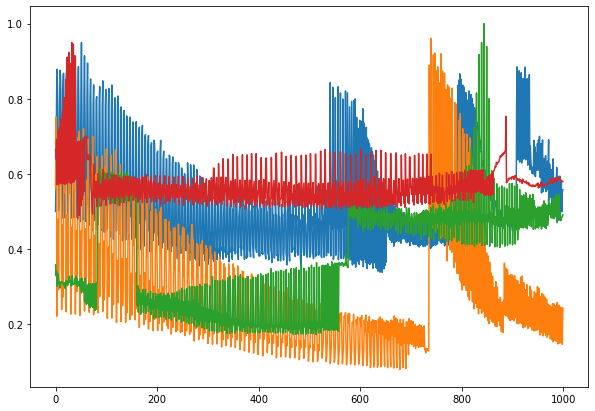

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(x_1[10])
plt.plot(x_2[10])
plt.plot(x_3[10])
plt.plot(x_4[10])
plt.show()

In [6]:
y_1 = pd.DataFrame(np.full((int(len(x_1)), 1), 0))
y_2 = pd.DataFrame(np.full((int(len(x_2)), 1), 1))
y_3 = pd.DataFrame(np.full((int(len(x_3)), 1), 2))
y_4 = pd.DataFrame(np.full((int(len(x_4)), 1), 3))

y_3


,0
0,2
1,2
2,2
3,2
4,2
...,...
995,2
996,2
997,2
998,2


In [7]:
x= pd.concat([x_1, x_2,x_3,x_4], axis=0, ignore_index=True)
x.shape
y= pd.concat([y_1, y_2,y_3,y_4], axis=0, ignore_index=True)
y =np.array( pd.Series.ravel(y))
x= np.array(x.iloc[:, 0:30])




In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5 , random_state=40, shuffle=True)

In [9]:
y_train.shape

(2000,)

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.score(X_train,y_train)

1.0

In [13]:
knn.score(X_test,y_test)

1.0

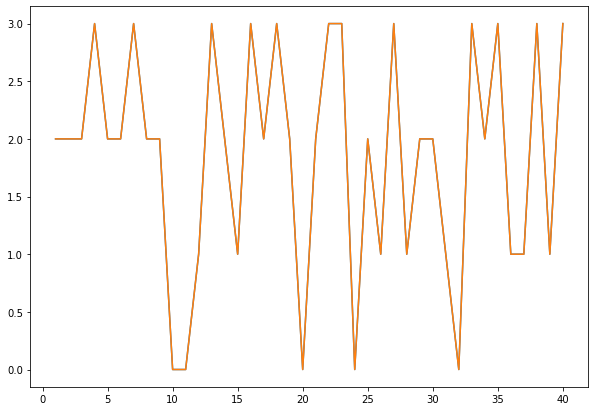

In [14]:
y_pred = knn.predict(X_test)

# Create a list of lists for all test cases with actual and predicted values

def Fn(data):
    if data==0:
        return 'normal'
    if data==1:
        return 'bearing'
    if data==3:
        return 'misalignment'
    else:
        return 'unbalance'
    
    
lent =  len(X_test)/50    
lent= int(lent)
data = [[i+1, (y_test[i]), (y_pred[i])] for i in range(lent)]
data=np.array(data)
t= data[:, 1:2]
z=data[:,2:3]
plt.figure(figsize=(10, 7))
plt.plot(data[:,0:1],t)
plt.plot(data[:,0:1],z)
plt.show()

# Define the headers for the table
# headers = ["Test case", "Actual", "Predicted"]

# # Print the table
# print("All test cases with actual vs predicted values:")
# print(tabulate(data, headers=headers, tablefmt="grid"))

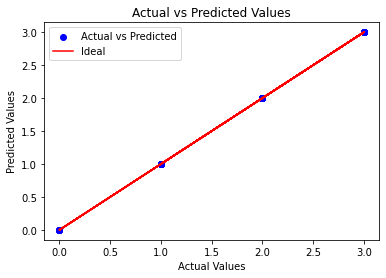

In [15]:
actual_values=data[:,1:2]
predicted_values = data[:,2:3]
plt.scatter(actual_values, predicted_values, color='b', label='Actual vs Predicted')
plt.plot(actual_values, actual_values, color='r', label='Ideal')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [16]:
def check_values(actual_values, predicted_values):
    if actual_values == predicted_values:
        return 1
    else:
        return 0

def f(actual,predict):
    x=[[i+1,check_values(actual[i],predict[i])] for i in range(len(actual))]
    return x

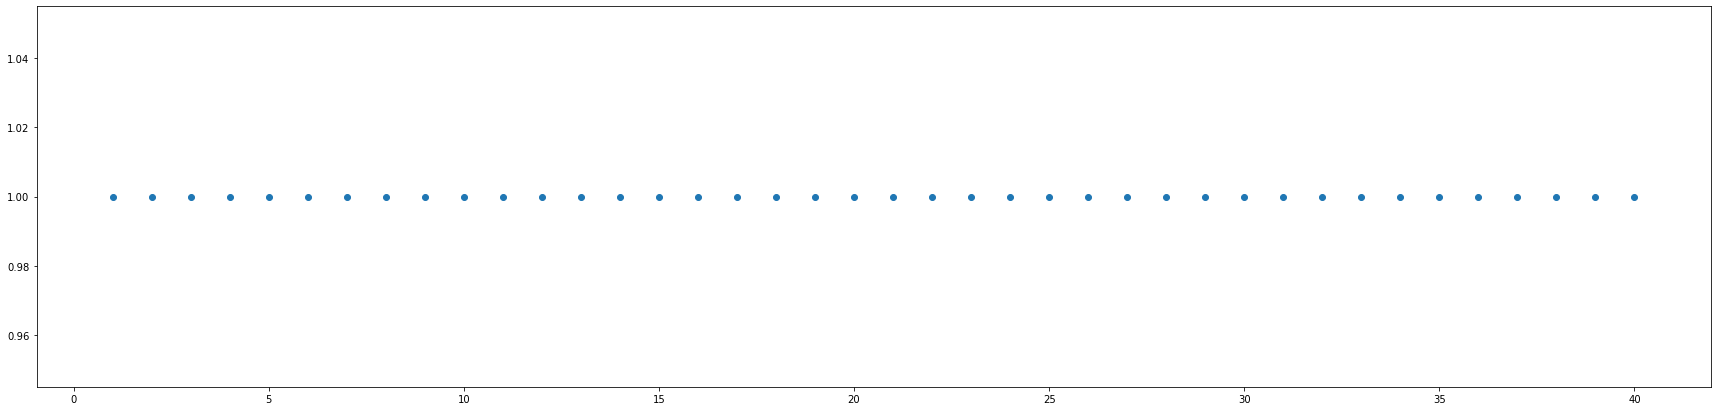

In [17]:
plt.figure(figsize=(30, 7))
x=np.array(f(actual_values,predicted_values))
plt.scatter(x[:,0],x[:,1])

In [19]:
svm_classifier = SVC(kernel='poly', degree=4)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy:", accuracy_score( svm_classifier.predict(X_train), y_train))

Test Accuracy: 1.0
Train Accuracy: 1.0
